In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
df = pd.read_csv('../../data/df_rfm.csv')

df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer_ID,Country,TotalSales
0,489434,85048,15CM_CHRISTMAS_GLASS_BALL_20_LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United_Kingdom,83.40
1,489434,22041,"RECORD_FRAME_7""_SINGLE_SIZE",48,2009-12-01 07:45:00,2.10,13085,United_Kingdom,100.80
2,489434,21232,STRAWBERRY_CERAMIC_TRINKET_BOX,24,2009-12-01 07:45:00,1.25,13085,United_Kingdom,30.00
3,489434,22064,PINK_DOUGHNUT_TRINKET_POT,24,2009-12-01 07:45:00,1.65,13085,United_Kingdom,39.60
4,489434,21871,SAVE_THE_PLANET_MUG,24,2009-12-01 07:45:00,1.25,13085,United_Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
713597,581587,22613,PACK_OF_20_SPACEBOY_NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
713598,581587,22899,CHILDREN'S_APRON_DOLLY_GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
713599,581587,23254,CHILDRENS_CUTLERY_DOLLY_GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
713600,581587,23255,CHILDRENS_CUTLERY_CIRCUS_PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [111]:
# prend seulement les dates de 2009 et decembre 2010 separer le data frame en deu
df_2009_2010 = df[(df['InvoiceDate'] >= '2009-12-01') & (df['InvoiceDate'] < '2010-12-01')]
df_2011 = df[df['InvoiceDate'] >= '2010-12-01']

In [112]:
df_2009_2010

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer_ID,Country,TotalSales
0,489434,85048,15CM_CHRISTMAS_GLASS_BALL_20_LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United_Kingdom,83.4
1,489434,22041,"RECORD_FRAME_7""_SINGLE_SIZE",48,2009-12-01 07:45:00,2.10,13085,United_Kingdom,100.8
2,489434,21232,STRAWBERRY_CERAMIC_TRINKET_BOX,24,2009-12-01 07:45:00,1.25,13085,United_Kingdom,30.0
3,489434,22064,PINK_DOUGHNUT_TRINKET_POT,24,2009-12-01 07:45:00,1.65,13085,United_Kingdom,39.6
4,489434,21871,SAVE_THE_PLANET_MUG,24,2009-12-01 07:45:00,1.25,13085,United_Kingdom,30.0
...,...,...,...,...,...,...,...,...,...
337794,536364,21175,GIN_+_TONIC_DIET_METAL_SIGN,12,2010-11-30 19:35:00,2.10,14441,United_Kingdom,25.2
337795,536364,21524,DOORMAT_SPOTTY_HOME_SWEET_HOME,2,2010-11-30 19:35:00,7.95,14441,United_Kingdom,15.9
337796,536364,21098,CHRISTMAS_TOILET_ROLL,12,2010-11-30 19:35:00,1.25,14441,United_Kingdom,15.0
337797,536364,21181,PLEASE_ONE_PERSON_METAL_SIGN,24,2010-11-30 19:35:00,2.10,14441,United_Kingdom,50.4


/tmp/ipykernel_12620/3675922494.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2009_2010['InvoiceDate'] = pd.to_datetime(df_2009_2010['InvoiceDate'])
/tmp/ipykernel_12620/3675922494.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2011['InvoiceDate'] = pd.to_datetime(df_2011['InvoiceDate'])
/home/thomas59/anaconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value o

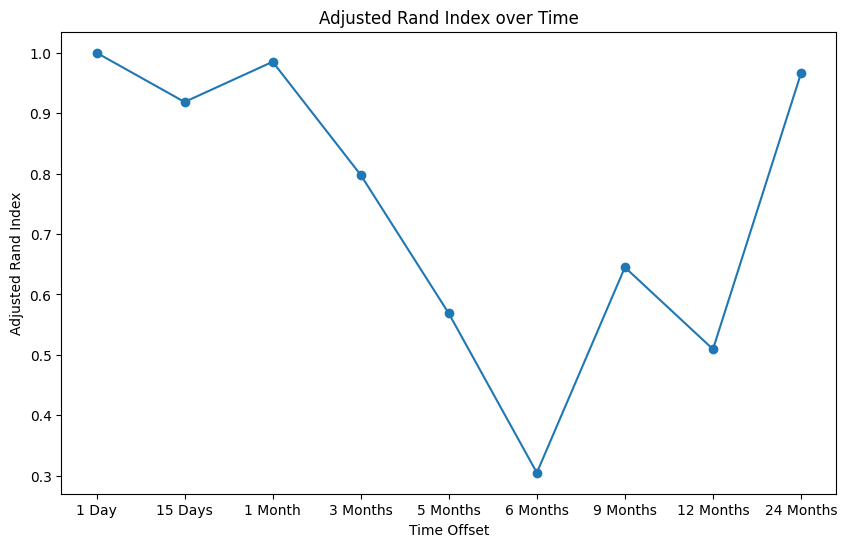

In [113]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import pandas as pd

# Ensure that InvoiceDate is in datetime format
df_2009_2010['InvoiceDate'] = pd.to_datetime(df_2009_2010['InvoiceDate'])
df_2011['InvoiceDate'] = pd.to_datetime(df_2011['InvoiceDate'])

# Define the list of time offsets
time_offsets = [
    pd.DateOffset(days=1),
    pd.DateOffset(days=15),
    pd.DateOffset(months=1),
    pd.DateOffset(months=3),
    pd.DateOffset(months=5),
    pd.DateOffset(months=6),
    pd.DateOffset(months=9),
    pd.DateOffset(years=1),
    pd.DateOffset(years=2),
]

# Initialize a list to store the ARI values
ari_values = []

# Define the initial labels as None
labels_prev = None

# For each time offset...
for offset in time_offsets:
    # Add the data from the offset to the 2009-2010 dataframe
    offset_date = df_2011['InvoiceDate'].min() + offset
    df_2009_2010_extended = pd.concat([df_2009_2010, df_2011[df_2011['InvoiceDate'] <= offset_date]])

    # Calculate the snapshot date for RFM calculations
    snapshot_date = df_2009_2010_extended['InvoiceDate'].max()

    # Calculate RFM values
    rfm = df_2009_2010_extended.groupby(['Customer_ID']).agg({
        'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
        'Invoice': 'count',
        'TotalSales': 'sum'})

    # Normalize RFM values
    rfm_normalized = (rfm - rfm.mean()) / rfm.std()

    # Apply K-Means Clustering to segment customers
    kmeans = KMeans(n_clusters=3, random_state=42) 
    kmeans.fit(rfm_normalized)
    rfm['Cluster'] = kmeans.labels_

    # If this is not the first iteration, calculate the Adjusted Rand Index
    if labels_prev is not None:
        # Keep only common customers in both dataframes
        common_customers = set(rfm_prev.index).intersection(set(rfm.index))
        labels_prev_common = labels_prev[rfm_prev.index.isin(common_customers)]
        labels_common = rfm['Cluster'][rfm.index.isin(common_customers)]
        
        # Calculate the Adjusted Rand Index
        ari_common = adjusted_rand_score(labels_prev_common, labels_common)
        ari_values.append(ari_common)

    # Update the previous labels and RFM dataframe for the next iteration
    labels_prev = rfm['Cluster']
    rfm_prev = rfm

# Create a line plot of ARI values over time
plt.figure(figsize=(10, 6))
plt.plot(
    ['1 Day', '15 Days', '1 Month', '3 Months', '5 Months', '6 Months', '9 Months', '12 Months', '24 Months'],
    [1] + ari_values,
    '-o'
)
plt.title('Adjusted Rand Index over Time')
plt.xlabel('Time Offset')
plt.ylabel('Adjusted Rand Index')
plt.show()


In [114]:
# met les ari value dans un tableau avec les dates
ari_values = pd.DataFrame({'Time Offset': time_offsets, 'ARI': [1] + ari_values})
ari_values

,Time Offset,ARI
0,<DateOffset: days=1>,1.000000
1,<DateOffset: days=15>,0.918494
2,<DateOffset: months=1>,0.985012
3,<DateOffset: months=3>,0.797799
4,<DateOffset: months=5>,0.568682
5,<DateOffset: months=6>,0.305049
6,<DateOffset: months=9>,0.644931
7,<DateOffset: years=1>,0.509427
8,<DateOffset: years=2>,0.966153


In [116]:
common_customers

{12346,
 12347,
 12348,
 12349,
 12350,
 12352,
 12353,
 12354,
 12355,
 12356,
 12357,
 12358,
 12359,
 12360,
 12361,
 12362,
 12364,
 12365,
 12366,
 12368,
 12369,
 12370,
 12371,
 12372,
 12373,
 12374,
 12375,
 12376,
 12377,
 12378,
 12379,
 12380,
 12381,
 12383,
 12384,
 12385,
 12386,
 12387,
 12388,
 12389,
 12390,
 12391,
 12392,
 12393,
 12394,
 12395,
 12396,
 12397,
 12398,
 12399,
 12400,
 12401,
 12402,
 12403,
 12405,
 12406,
 12407,
 12408,
 12409,
 12410,
 12411,
 12412,
 12413,
 12414,
 12415,
 12416,
 12417,
 12418,
 12419,
 12420,
 12421,
 12422,
 12423,
 12424,
 12425,
 12426,
 12427,
 12428,
 12429,
 12430,
 12431,
 12432,
 12433,
 12434,
 12435,
 12436,
 12437,
 12438,
 12439,
 12440,
 12441,
 12443,
 12444,
 12445,
 12446,
 12447,
 12448,
 12449,
 12450,
 12451,
 12452,
 12453,
 12454,
 12455,
 12456,
 12457,
 12458,
 12459,
 12460,
 12461,
 12462,
 12463,
 12464,
 12465,
 12467,
 12468,
 12469,
 12471,
 12472,
 12473,
 12474,
 12475,
 12476,
 12477,
 12479,
